In [37]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, NullFormatter, LogLocator

In [38]:
national_data_url = 'https://info.gesundheitsministerium.at/data/national.csv'

first_date = datetime.date(2021, 1, 5)
first_date_daily_increase = datetime.datetime(2021, 1, 11)

In [39]:
national_data = pd.read_csv(national_data_url, sep=';')
national_data['Datum'] = pd.to_datetime(national_data['Datum'])

In [40]:
df_valid_dates = national_data[national_data['Datum'] >= first_date_daily_increase]
latest_delivered = df_valid_dates['Auslieferungen'].values[-1]
daily_diff = df_valid_dates['Auslieferungen'].diff()

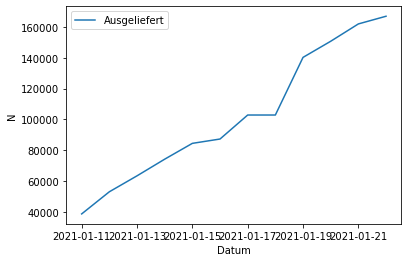

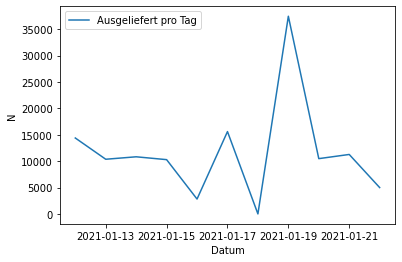

In [41]:
fig, ax = plt.subplots()
ax.plot(df_valid_dates['Datum'], df_valid_dates['Auslieferungen'], label='Ausgeliefert')
# ax.set_yscale('log')
ax.set_xlabel('Datum')
ax.set_ylabel('N')
# ax.yaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_locator(LogLocator(subs=(0.25, 0.5, 0.75, 1 )))
# ax.yaxis.set_minor_formatter(NullFormatter())
ax.legend()

fig, ax = plt.subplots()
ax.plot(df_valid_dates['Datum'], daily_diff, label='Ausgeliefert pro Tag')
ax.set_xlabel('Datum')
ax.set_ylabel('N')
ax.legend()

In [42]:
print('Delivered: %d' % (latest_delivered))
print('Average delivered per day: %d' % (daily_diff.mean(), ))
print('Average delivered last 7 days: %d' % (daily_diff.tail(7).mean(), ))

Delivered: 166956
Average delivered per day: 11673
Average delivered last 7 days: 11796
